Neste banco de dados irems fazer uma limpeza e tratamento

No conteudo desde Banco de dados, podemos fazer algumas conexões entre a parte financeira (features Patrimonio, Saldo e Salario) com identidade do clente como Estado, Genero e Idade)

Para Patrimonio, foram colocados em uma escala de 0 á 10, assim o 10, sigiifica que tem o patrimonio maior comparado aos demais

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/+/xxx.csv",sep=';')
df.columns=['ID','Score','Estado','Genero','Idade','Patrimonio','Saldo','Produtos','TemCartCredito','Ativo','Salario','Saiu']
df=df.drop('Saiu',axis=1)

In [2]:
df.head(10)

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario
0,1,619,RS,Feminino,42,2,0,1,1,1,1.013489e+07
1,2,608,SC,Feminino,41,1,8380786,1,0,1,1.125426e+07
2,3,502,RS,Feminino,42,8,1596608,3,1,0,1.139316e+07
3,4,699,RS,Feminino,39,1,0,2,0,0,9.382663e+06
4,5,850,SC,Feminino,43,2,12551082,1,1,1,7.908410e+05
5,6,645,SC,Masculino,44,8,11375578,2,1,0,1.497567e+07
6,7,822,RS,M,50,7,0,2,1,1,1.006280e+05
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10
8,9,501,RS,Masculino,44,4,14205107,2,0,1,7.494050e+05
9,10,684,RS,Masculino,27,2,13460388,1,1,1,7.172573e+06


Editando feature Genero

In [3]:
#df.groupby('Genero')['Genero'].size()                  # outlier genero
#df['Genero'].value_counts(dropna=False)
#df['Genero'].unique()

lista={'F':'Feminino','Fem':'Feminino','M':'Masculino'}
df['Genero'].replace(lista,inplace=True)

Editando dados duplicatos

In [4]:
#df[df.duplicated(keep=False)]                        # duplicatos
#df[78:].head(5)
#df[df['ID']==81]

df.drop_duplicates(subset='ID',keep='first',inplace=True)
df.reset_index(drop=True, inplace=True)
df.drop('ID',inplace=True,axis=1)

#ou
#df[df.duplicated(keep=False)].index
#df.drop(80,inplace=True)

Editando campos vazios

In [5]:
#df.isna().sum()                                                # campos vazios
#df['Genero'].unique()
#df[df['Genero'].isna()]

df.dropna(subset=['Salario'], inplace=True)
df.dropna(subset=['Genero'], inplace=True)

#ou
#df.dropna(inplace=True)

#ou
#indice=df[df['Salario'].isna()]
#df.drop(indice.index,inplace=True)

Editando Outliers da feature Idade

In [6]:
#df.describe()                        # outliers de idade
#df.sort_values('Idade')

indice=df[df['Idade']<15]
df.drop(indice.index,inplace=True)

indices2=df[df['Idade']>100]
df.drop(indices2.index,inplace=True)

#ou
#df.drop(990,inplace=True)

Editando Outliers da feature Estado

In [7]:
#df.groupby(['Estado']).size()             # outliers de estado

lista1=['RS','SC','PR']
lista2=['SP','RP','TD']
#df[df['Estado'].isin(lista2)]

indice=df[~df['Estado'].isin(lista1)]
df.drop(indice.index,inplace=True)

#ou
#estado=df[(df['Estado']=='RP') | (df['Estado']=='SP') | (df['Estado']=='TD')].index
#df.drop(estado,inplace=True)

Analisando feature Salario

Criado nova coluna de Salario, para ficar mais facil de visualizar no boxplot

In [8]:
df['Salario_reduzido']=df['Salario']/100000
df['Salario_reduzido']=df['Salario_reduzido'].astype(int)
df

,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Salario_reduzido
0,619,RS,Feminino,42,2,0,1,1,1,10134888.0,101
1,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,112
2,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,113
3,699,RS,Feminino,39,1,0,2,0,0,9382663.0,93
4,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,7
...,...,...,...,...,...,...,...,...,...,...,...
993,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,145
994,610,SC,Masculino,29,9,0,3,0,1,8391224.0,83
995,811,SC,Masculino,44,3,0,2,0,1,7843973.0,78
996,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,6


Fazendo um box plot, vemos que há 2 dados muito distantes das demais

<Axes: >

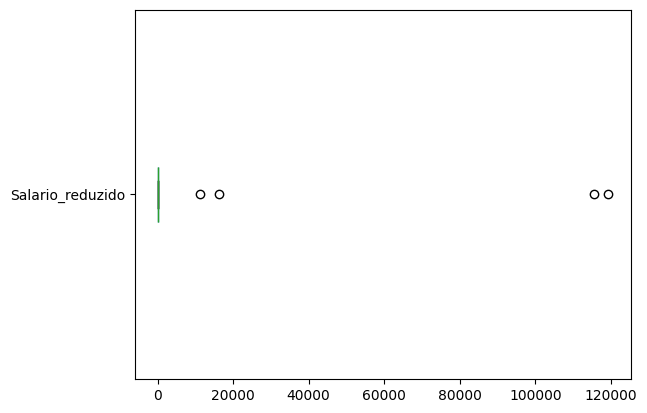

In [9]:
df.boxplot(column='Salario_reduzido', grid=False, patch_artist=True, vert=False)

Exclui 4 dados para uma melhor apresentação no gráfico

<Axes: >

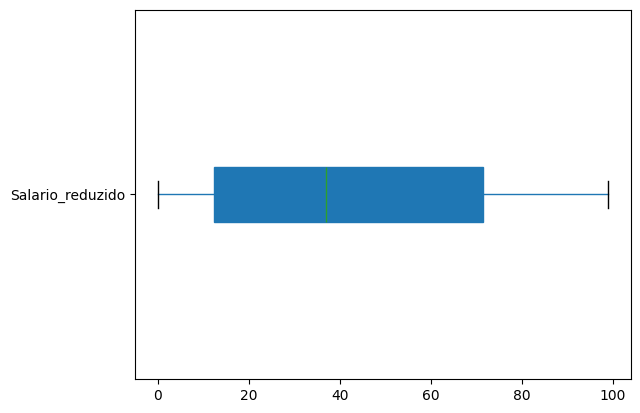

In [10]:
df['Salario_reduzido'].sort_values(ascending=False)
df = df[df['Salario_reduzido']< 100]
df.boxplot(column='Salario_reduzido', grid=False, patch_artist=True, vert=False)

Vamos acima, que grande parte do salario da nossa base se concentra aproximadamente 15 mil e 70 mil anuais, vejamos melhor na tabela abaixo

In [11]:
df['Salario_reduzido'].describe()

,Salario_reduzido
count,543.000000
mean,41.926335
std,31.595490
min,0.000000
25%,12.500000
50%,37.000000
75%,71.500000
max,99.000000


Agora nova coluna de Salario para a moeda real

Obs, nos boxplot acima, nao aceita valores em moedas

In [12]:
df['Salario real'] = df['Salario'].astype(int)
df['Salario real'] = df['Salario'].apply(lambda x: f"{x/100:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
df.sort_values(by='Salario',ascending=False)

,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Salario_reduzido,Salario real
249,771,PR,Feminino,36,5,778469,1,0,0,9980599.0,99,"99.805,99"
97,710,SC,Masculino,22,8,0,2,0,0,9964504.0,99,"99.645,04"
108,479,PR,Masculino,35,9,9283389,1,1,0,9944986.0,99,"99.449,86"
794,761,PR,Masculino,36,8,10823911,2,0,0,9944402.0,99,"99.444,02"
63,684,SC,Masculino,56,8,7870716,1,1,1,9939836.0,99,"99.398,36"
...,...,...,...,...,...,...,...,...,...,...,...,...
241,703,RS,Masculino,37,8,10596168,2,0,1,10000.0,0,"100,00"
27,571,RS,Masculino,44,9,0,2,0,0,10000.0,0,"100,00"
469,631,SC,Masculino,27,10,13416962,1,1,1,10000.0,0,"100,00"
276,777,RS,Feminino,53,10,0,2,1,0,10000.0,0,"100,00"


Abaixo um gráfico de correlação entre Iadde e Salario, mas conforme vemos, não nos agrega em nada

<Axes: xlabel='Idade', ylabel='Salario_reduzido'>

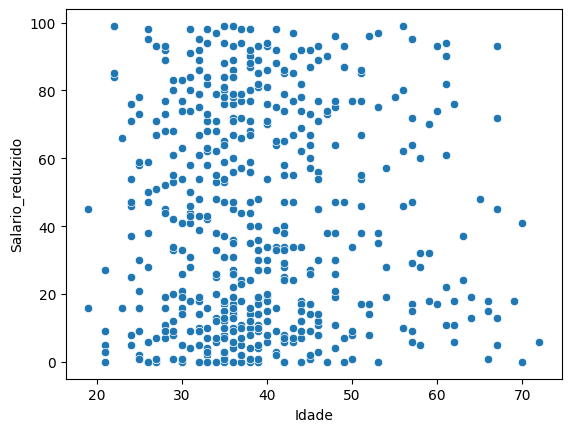

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df,x='Idade',y='Salario_reduzido')

Com uma filtragem simples, no estado de PR, podemos ver que é mais diversificado

<Axes: xlabel='Idade', ylabel='Salario_reduzido'>

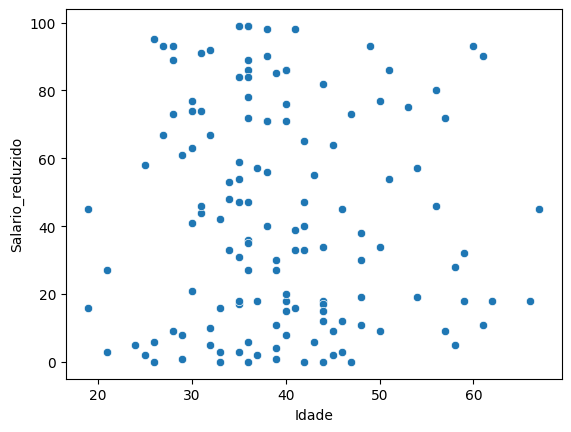

In [14]:
lista=['PR']
df3=df.query('Idade > 60' and 'Patrimonio > 8' and 'Estado in @lista')

sns.scatterplot(data=df3,x='Idade',y='Salario_reduzido')

Abaixo agora por gráfico de barras, semelahnte ao de dispersão, os dados estão bem distribuidos

<Axes: xlabel='Idade', ylabel='Salario_reduzido'>

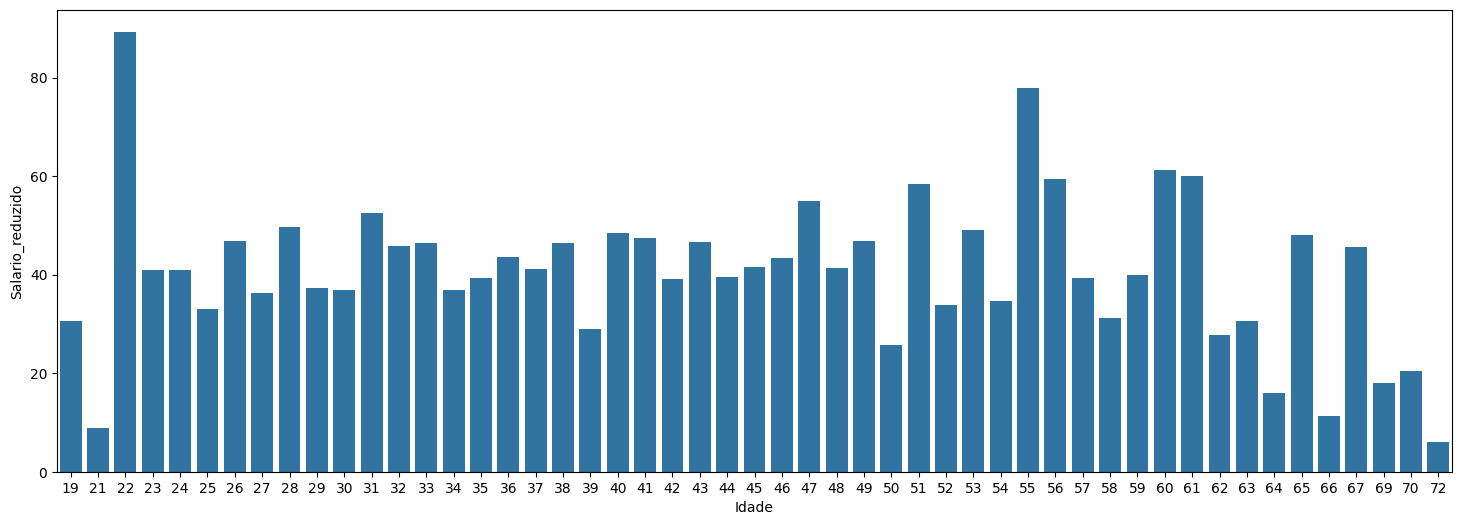

In [21]:
plt.figure(figsize=(18,6))
sns.barplot(x='Idade', y='Salario_reduzido', data=df, ci=None)

Já o gráfico abaixo é interessante, porque a idade 22 e 55, tem o maior salario e o menor salario é o maior comparado com a maioria das idades

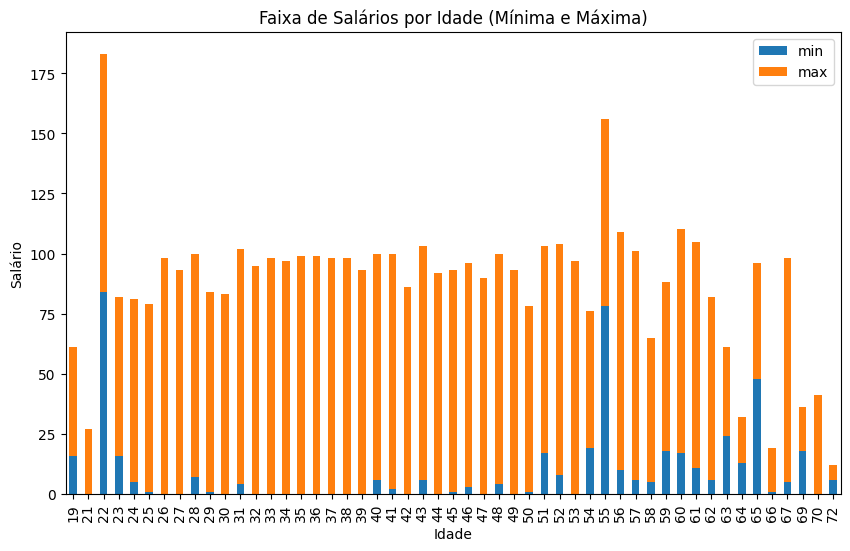

In [23]:
df_agrupado2 = df.groupby('Idade')['Salario_reduzido'].agg(['min', 'max']).reset_index()
df_agrupado2.set_index('Idade')[['min', 'max']].plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Faixa de Salários por Idade (Mínima e Máxima)')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.show()